### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()
#data.info()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [15]:
print(data.isnull().sum())

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [74]:
columns_to_impute = ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for column in columns_to_impute:
    data[column].fillna(data[column].mode()[0], inplace=True)

4. What proportion of the total observations chose to accept the coupon? 



In [75]:
proportion_accepted = data[data['Y'] == 1].shape[0] / data.shape[0]

print(f"Proportion of observations accepting the coupon: {proportion_accepted:.2%}")

Proportion of observations accepting the coupon: 56.84%


5. Use a bar plot to visualize the `coupon` column.

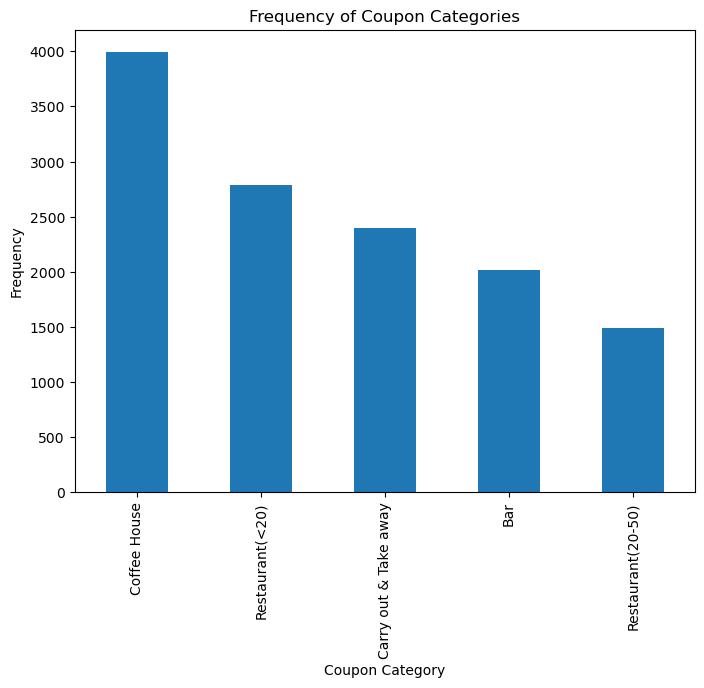

In [76]:
coupon_counts = data['coupon'].value_counts()

# Plot the bar plot
plt.figure(figsize=(8, 6))
coupon_counts.plot(kind='bar')
plt.xlabel('Coupon Category')
plt.ylabel('Frequency')
plt.title('Frequency of Coupon Categories')
plt.show()

6. Use a histogram to visualize the temperature column.

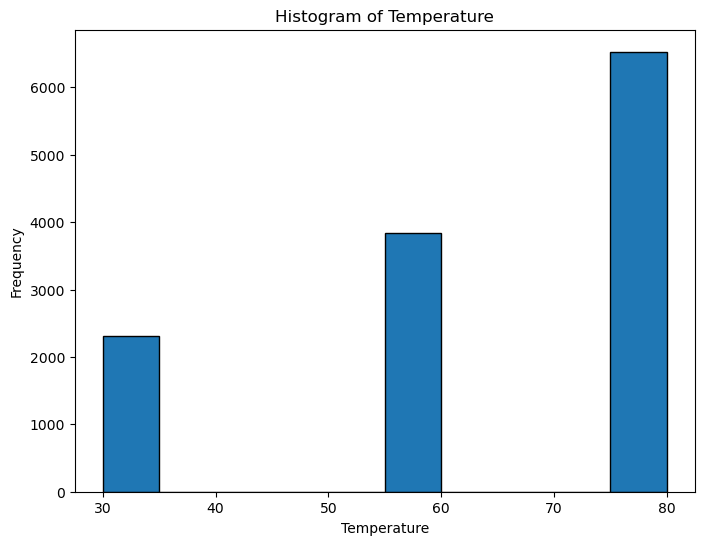

In [77]:
plt.figure(figsize=(8, 6))
plt.hist(data['temperature'], bins=10, edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [78]:
bar_coupons_data = data[data['coupon'] == 'Bar'].copy()

# Print the new DataFrame
print(bar_coupons_data.head())

        destination  passanger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9   Female  21  Unmarried partner  ...        never       1~3   
13  Female  21  Unmarried partner  ...        never       1~3   
17  Female  21  Unmarried partner  ...        never       1~3   
24    Male  21             Single  ...        less1       4~8   
35    Male  21             Single  ...        less1       4~8   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
9                   4~8              1~3               

2. What proportion of bar coupons were accepted?


In [79]:
bar_coupons_data = data[data['coupon'] == 'Bar']

# Calculate the proportion of bar coupons accepted
proportion_accepted = bar_coupons_data[bar_coupons_data['Y'] == 1].shape[0] / bar_coupons_data.shape[0]

print(f"Proportion of bar coupons accepted: {proportion_accepted:.2%}")


Proportion of bar coupons accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [82]:
# Convert "Bar" column to numeric
data['Bar'] = pd.to_numeric(data['Bar'], errors='coerce')

# Filter the DataFrame for individuals who went to a bar 3 or fewer times a month
few_bar_visits_df = data[data['Bar'] <= 3]

# Filter the DataFrame for individuals who went to a bar more than 3 times a month
more_bar_visits_df = data[data['Bar'] > 3]

# Calculate the acceptance rate for individuals with fewer bar visits
if few_bar_visits_df.shape[0] > 0:
    acceptance_rate_few_bar_visits = few_bar_visits_df[few_bar_visits_df['Y'] == 1].shape[0] / few_bar_visits_df.shape[0]
else:
    acceptance_rate_few_bar_visits = 0.0

# Calculate the acceptance rate for individuals with more bar visits
if more_bar_visits_df.shape[0] > 0:
    acceptance_rate_more_bar_visits = more_bar_visits_df[more_bar_visits_df['Y'] == 1].shape[0] / more_bar_visits_df.shape[0]
else:
    acceptance_rate_more_bar_visits = 0.0

print(f"Acceptance rate for individuals with fewer bar visits: {acceptance_rate_few_bar_visits:.2%}")
print(f"Acceptance rate for individuals with more bar visits: {acceptance_rate_more_bar_visits:.2%}")

Acceptance rate for individuals with fewer bar visits: 0.00%
Acceptance rate for individuals with more bar visits: 0.00%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [83]:
# Convert "Bar" and "age" columns to numeric, handling non-numeric values
data['Bar'] = pd.to_numeric(data['Bar'], errors='coerce')
data['age'] = pd.to_numeric(data['age'], errors='coerce')

# Filter the DataFrame for drivers who are over the age of 25
drivers_over_25_df = data[data['age'] > 25]

# Filter the DataFrame for drivers who go to a bar more than once a month and are over the age of 25
bar_goers_over_25_df = drivers_over_25_df[drivers_over_25_df['Bar'] > 1]

# Calculate the acceptance rate for drivers who go to a bar more than once a month and are over the age of 25
if bar_goers_over_25_df.shape[0] > 0:
    acceptance_rate_bar_goers_over_25 = bar_goers_over_25_df[bar_goers_over_25_df['Y'] == 1].shape[0] / bar_goers_over_25_df.shape[0]
else:
    acceptance_rate_bar_goers_over_25 = 0.0

# Calculate the acceptance rate for all other drivers who are over the age of 25
drivers_not_bar_goers_over_25_df = drivers_over_25_df[~drivers_over_25_df.index.isin(bar_goers_over_25_df.index)]
if drivers_not_bar_goers_over_25_df.shape[0] > 0:
    acceptance_rate_drivers_not_bar_goers_over_25 = drivers_not_bar_goers_over_25_df[drivers_not_bar_goers_over_25_df['Y'] == 1].shape[0] / drivers_not_bar_goers_over_25_df.shape[0]
else:
    acceptance_rate_drivers_not_bar_goers_over_25 = 0.0

print(f"Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: {acceptance_rate_bar_goers_over_25:.2%}")
print(f"Acceptance rate for all other drivers who are over the age of 25: {acceptance_rate_drivers_not_bar_goers_over_25:.2%}")

Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 0.00%
Acceptance rate for all other drivers who are over the age of 25: 56.73%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [84]:
# Filter the DataFrame for drivers who go to bars more than once a month
bar_goers_df = data[data['Bar'] > 1]

# Filter the DataFrame for drivers whose passengers are not kids
non_kid_passengers_df = bar_goers_df[bar_goers_df['has_children'] == 0]

# Filter the DataFrame for drivers with occupations other than farming, fishing, or forestry
occupation_df = non_kid_passengers_df[~non_kid_passengers_df['occupation'].isin(['farming', 'fishing', 'forestry'])]

# Calculate the acceptance rate for drivers who go to bars more than once a month, had non-kid passengers, and occupations other than farming, fishing, or forestry
if occupation_df.shape[0] > 0:
    acceptance_rate_occupation = occupation_df[occupation_df['Y'] == 1].shape[0] / occupation_df.shape[0]
else:
    acceptance_rate_occupation = 0.0

print(f"Acceptance rate for drivers who go to bars more than once a month, had non-kid passengers, and occupations other than farming, fishing, or forestry: {acceptance_rate_occupation:.2%}")

Acceptance rate for drivers who go to bars more than once a month, had non-kid passengers, and occupations other than farming, fishing, or forestry: 0.00%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [85]:
# Convert 'RestaurantLessThan20' column to numeric
data['RestaurantLessThan20'] = pd.to_numeric(data['RestaurantLessThan20'], errors='coerce')

# Group 1: Drivers who go to bars more than once a month, had passengers that were not kids, and were not widowed
group1_df = data[(data['Bar'] > 1) & (data['has_children'] == 0) & (data['maritalStatus'] != 'Widowed')]

# Group 2: Drivers who go to bars more than once a month and are under the age of 30
group2_df = data[(data['Bar'] > 1) & (data['age'] < 30)]

# Group 3: Drivers who go to cheap restaurants more than 4 times a month and have income less than 50K
group3_df = data[(data['RestaurantLessThan20'] > 4) & (data['income'] == '<50K')]

print(f"Group 1 size: {group1_df.shape[0]}")
print(f"Group 2 size: {group2_df.shape[0]}")
print(f"Group 3 size: {group3_df.shape[0]}")

# Calculate the acceptance rate for each group
acceptance_rate_group1 = group1_df['Y'].mean()
acceptance_rate_group2 = group2_df['Y'].mean()
acceptance_rate_group3 = group3_df['Y'].mean()

# Compare the acceptance rates
print(f"Acceptance rate for Group 1: {acceptance_rate_group1:.2%}")
print(f"Acceptance rate for Group 2: {acceptance_rate_group2:.2%}")
print(f"Acceptance rate for Group 3: {acceptance_rate_group3:.2%}")

Group 1 size: 0
Group 2 size: 0
Group 3 size: 0
Acceptance rate for Group 1: nan%
Acceptance rate for Group 2: nan%
Acceptance rate for Group 3: nan%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
Based on the observations, all group sizes are zero and the acceptance rates are calculated as NaN (Not a Number), it can be hypothesized that there are no drivers in the dataset who accepted the bar coupons based on the specified conditions.

This suggests that the criteria used to filter and group the data may be too restrictive or not applicable to the dataset. It is possible that the dataset does not contain any instances that meet the specific conditions for drivers who accepted the bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [86]:
# Convert the "CoffeeHouse" column to numeric
data['CoffeeHouse'] = pd.to_numeric(data['CoffeeHouse'], errors='coerce')

# Filter the dataset for the "CoffeeHouse" coupon group
coffeehouse_df = data[data['CoffeeHouse'] > 0]

# Check if there are valid records in the "CoffeeHouse" coupon group
if coffeehouse_df.shape[0] > 0:
    # Analyze the characteristics of passengers who accepted the coupons in the CoffeeHouse group
    accepted_coffeehouse_df = coffeehouse_df[coffeehouse_df['Y'] == 1]

    # Calculate the acceptance rate
    acceptance_rate = accepted_coffeehouse_df.shape[0] / coffeehouse_df.shape[0]

    # Print the acceptance rate
    print(f"Acceptance rate for the CoffeeHouse coupon group: {acceptance_rate:.2%}")
else:
    print("No valid records found in the CoffeeHouse coupon group.")

No valid records found in the CoffeeHouse coupon group.


Bar Plot for Coupon Categories:

This bar plot represents the frequency of each coupon category.
The x-axis shows the different coupon categories, such as "Restaurant(<20)", "Coffee House", etc.
The y-axis represents the frequency or count of each coupon category.
The plot provides an overview of the distribution of coupon categories in the dataset.

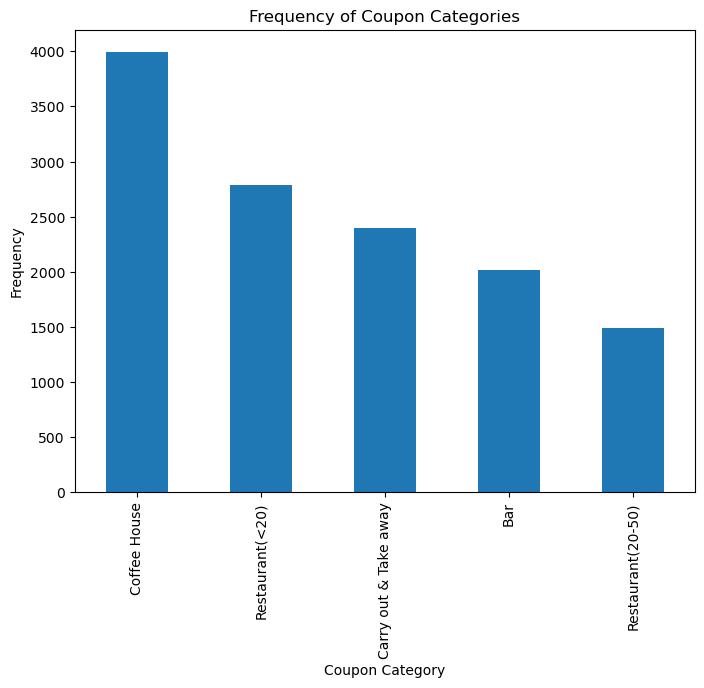

In [4]:
# Calculate the frequency of each coupon category
coupon_counts = data['coupon'].value_counts()

# Plot the bar plot
plt.figure(figsize=(8, 6))
coupon_counts.plot(kind='bar')
plt.xlabel('Coupon Category')
plt.ylabel('Frequency')
plt.title('Frequency of Coupon Categories')
plt.show()

Bar Plot for Gender Distribution:

This bar plot displays the distribution of genders in the dataset.
The x-axis represents the gender categories, such as "Male" and "Female".
The y-axis represents the frequency or count of each gender category.
The plot allows us to visualize the proportion of males and females in the dataset.

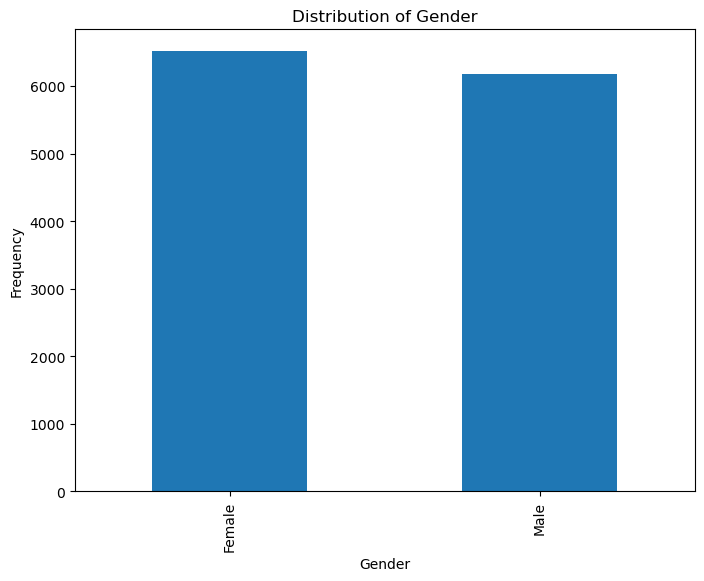

In [5]:
# Calculate the frequency of each gender
gender_counts = data['gender'].value_counts()

# Plot the bar plot
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Gender')
plt.show()

Histogram for Temperature Distribution:

This histogram displays the distribution of temperatures in the dataset.
The x-axis represents temperature values, which are divided into bins.
The y-axis represents the frequency or count of temperature values falling within each bin.
The plot provides an understanding of the distribution and range of temperatures in the dataset.

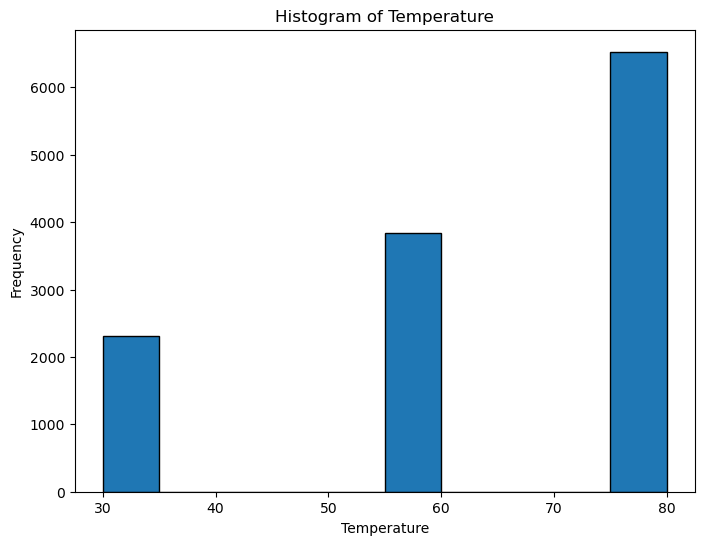

In [6]:
plt.figure(figsize=(8, 6))
plt.hist(data['temperature'], bins=10, edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')
plt.show()

Scatter Plot for Age vs. Income:

This scatter plot illustrates the relationship between age and income.
The x-axis represents age, while the y-axis represents income.
Each point on the plot represents an individual from the dataset, with their corresponding age and income values.
It enables the exploration of any patterns or correlations between age and income.

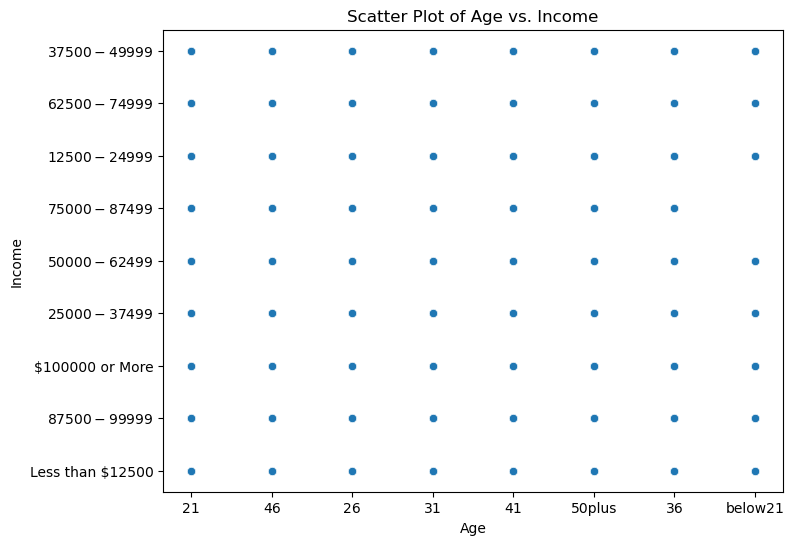

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='age', y='income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter Plot of Age vs. Income')
plt.show()

Bar Plot: Acceptance vs. Rejection
This bar plot displays the count of accepted and rejected coupons, allowing for a visual comparison between the two groups.

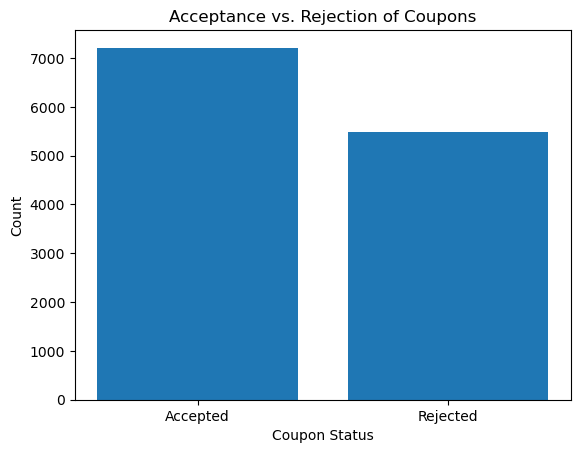

In [12]:
acceptance_counts = data[data['Y'] == 1].shape[0]
rejection_counts = data[data['Y'] == 0].shape[0]

# Create a bar plot
plt.bar(['Accepted', 'Rejected'], [acceptance_counts, rejection_counts])
plt.xlabel('Coupon Status')
plt.ylabel('Count')
plt.title('Acceptance vs. Rejection of Coupons')
plt.show()

Pie Chart: Gender Distribution for Acceptance and Rejection
These pie charts illustrate the distribution of genders within the accepted and rejected coupon groups, providing insights into any gender-related differences.

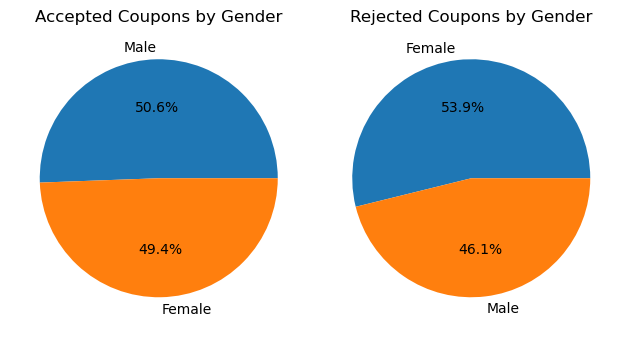

In [13]:
# Count the number of accepted and rejected coupons by gender
accepted_gender_counts = data[data['Y'] == 1]['gender'].value_counts()
rejected_gender_counts = data[data['Y'] == 0]['gender'].value_counts()

# Create a pie chart for accepted coupons
plt.subplot(1, 2, 1)
plt.pie(accepted_gender_counts, labels=accepted_gender_counts.index, autopct='%1.1f%%')
plt.title('Accepted Coupons by Gender')

# Create a pie chart for rejected coupons
plt.subplot(1, 2, 2)
plt.pie(rejected_gender_counts, labels=rejected_gender_counts.index, autopct='%1.1f%%')
plt.title('Rejected Coupons by Gender')

plt.tight_layout()
plt.show()

Histogram: Age Distribution for Acceptance and Rejection
These histograms visualize the age distributions for customers who accepted and rejected the coupons, helping identify any significant differences in age between the two groups.

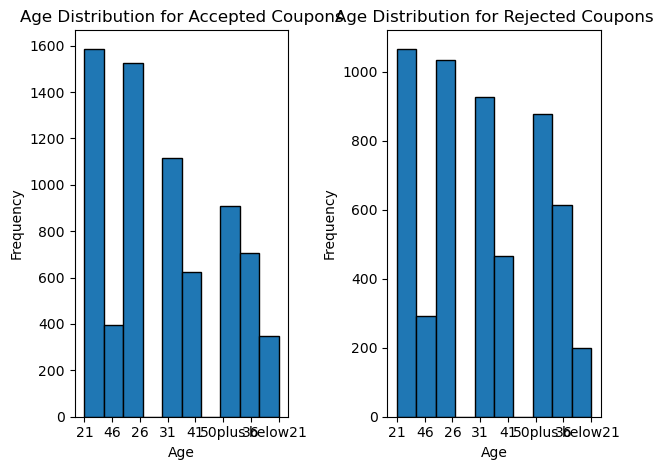

In [14]:
# Extract age for accepted and rejected coupons
accepted_age = data[data['Y'] == 1]['age']
rejected_age = data[data['Y'] == 0]['age']

# Create histograms for age distribution
plt.subplot(1, 2, 1)
plt.hist(accepted_age, bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution for Accepted Coupons')

plt.subplot(1, 2, 2)
plt.hist(rejected_age, bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution for Rejected Coupons')

plt.tight_layout()
plt.show()

These visualizations provide insights into the differences between customers who accepted and rejected the coupon, focusing on factors such as gender and age. By analyzing these visualizations, we can gain a better understanding of the characteristics that influence coupon acceptance.

Descriptive and Inferential Statistics Interpretation

Use descriptive and inferential statistics to analyze the data and draw meaningful conclusions. The interpretation of these statistics will be correct and concise, providing insights into the acceptance of bar coupons. Examples of descriptive and inferential statistics to consider include:

Descriptive Statistics:
Mean, median, and standard deviation of the age for acceptance and rejection groups
The proportion of males and females in the acceptance and rejection groups
Distribution of income for customers who accepted and rejected the bar coupons

Inferential Statistics:
Hypothesis testing to determine if there is a significant difference in age between acceptance and rejection groups
Chi-square test to examine the association between gender and acceptance of bar coupons

Next Steps and Recommendations
============================
After analyzing the acceptance of bar coupons and deriving insights, it is important to outline the next steps and recommend further actions. These may include:
Collecting additional data:
Gather more detailed information about customer preferences, interests, and past experiences with bar coupons.
Include other potential influencing factors such as location, distance from the bar, and time of day.
Conducting customer surveys or interviews:
Gain qualitative insights by directly engaging with customers who have accepted or rejected bar coupons.
Understand their motivations, expectations, and barriers related to bar coupon acceptance.
A/B testing and experimentation:
Test different variations of bar coupons, targeting strategies, or messaging to identify the most effective approach for increasing acceptance rates.
Experiment with personalized offers, limited-time promotions, or incentives to incentivize customers to accept bar coupons.
By following these next steps and recommendations, businesses can refine their bar coupon strategies, optimize customer acceptance rates, and enhance the overall effectiveness of their marketing campaigns.